# Breast Cancer Dataset

Breast Cancer is a very common cancer among women, making it a significant health issue across not only the UK, but the globe. It is well documented that an early diagnosis is critical to help women  increase their survival chance. Most lumps are classified as either benign (not harmful) or malignant (cancerous).

This notebook will be looking at using supervised algorithms to classify whether an individuals' breast data indicates that the lump is benign or malignant.

The dataset can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

### Data Overview
This dataset is made up of 32 columns, each relating to a feature of a breast mass.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
# import visuals as vs

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [2]:
# read in the data
df = pd.read_csv("breast_cancer_data.csv", header =0)

In [3]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.1466,0.08087,...,19.26,26.00,124.9,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
1,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,...,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.0594,0.04819,...,16.25,26.19,109.1,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472


### Exploring The Data

This section will look to give us an understanding of the dataset

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
#get the length of our dataframe
print(df.shape)

(569, 32)


We can see that the data set contains 569 rows and 32 columns.

In [6]:
# lets look at how many null values we have
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Comments
Here we can see that we have no null values - this is great as we do not have to remove or input any values!
We can remove the ID column as this does not hold any significance. 

There is only one column that needs to be converted; the diagnosis. This is currently 'object' type so let's convert it so 0 or 1. (1 if malignant, 0 if benign).


In [9]:
df =df.drop(['id'], axis=1)
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [10]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0 )

In [11]:
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        15.46         19.48          101.70      748.9   
1          0        12.89         13.12           81.89      515.9   
2          0        14.96         19.10           97.03      687.3   
3          0        12.94         16.17           83.18      507.6   
4          1        13.17         18.66           85.98      534.6   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10920           0.12230         0.14660              0.08087   
1          0.06955           0.03729         0.02260              0.01171   
2          0.08992           0.09823         0.05940              0.04819   
3          0.09879           0.08836         0.03296              0.02390   
4          0.11580           0.12310         0.12260              0.07340   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1931  ...         19.26          

In [12]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [13]:
correlation = df.corr()
print(correlation.head(1))

           diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis        1.0     0.730029      0.415185        0.742636   0.708984   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis          0.35856          0.596534         0.69636   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis             0.776614       0.330499  ...      0.776454   

           texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis       0.456903         0.782914    0.733825          0.421465   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis           0.590998          0.65961              0.793566   

           symmetry_worst  fractal_dimension_worst  
diagnosis        0.416294                 0.323872  

[1 rows x 31 columns]


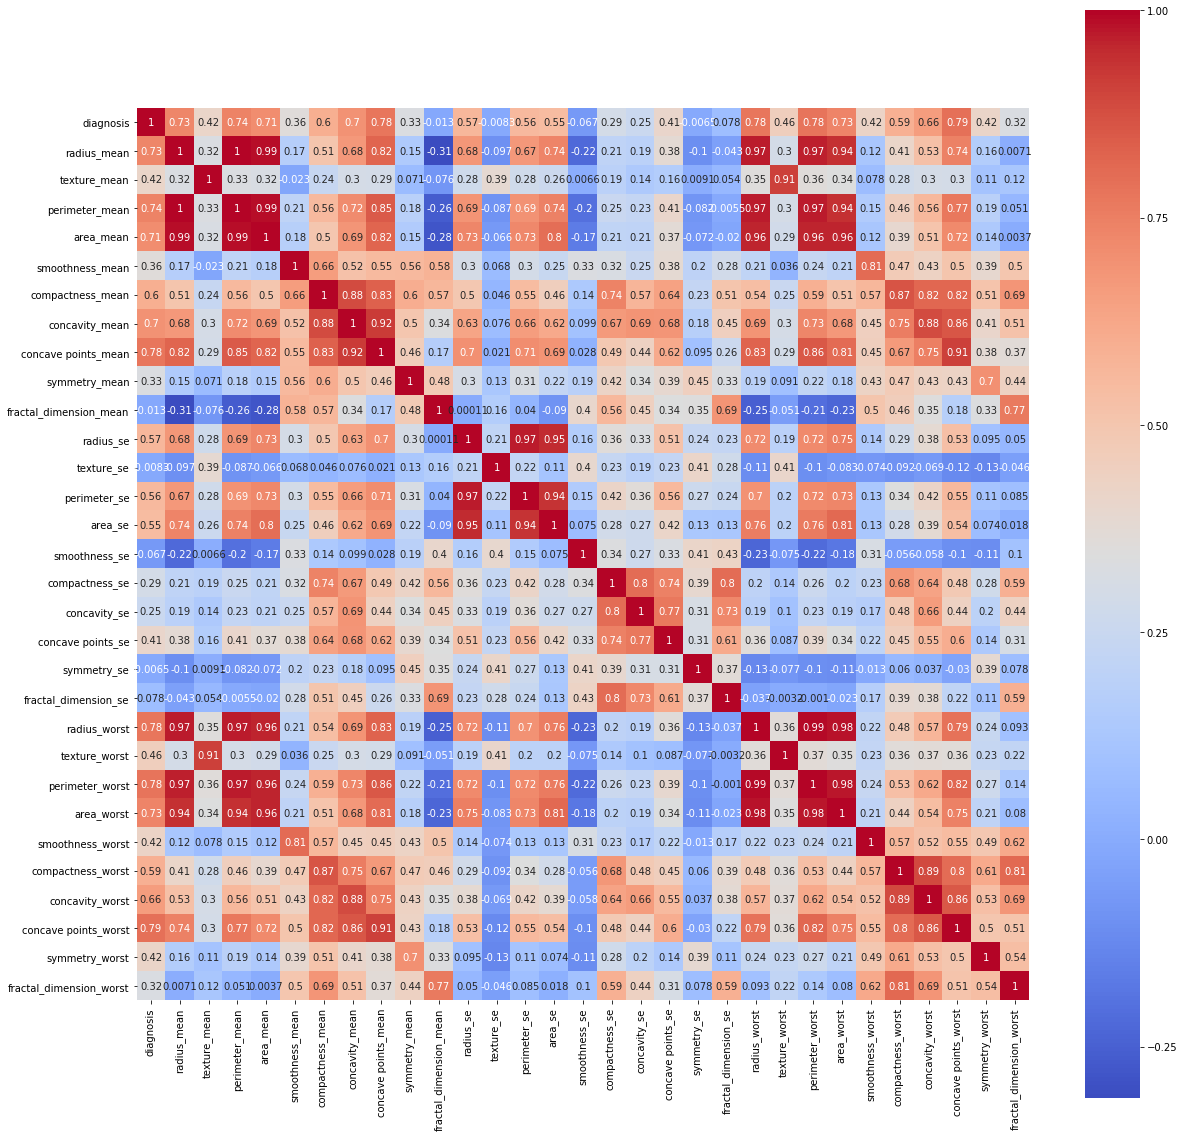

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

### Overview of the data
Here were can see overall that there are 357 cases of benign lumps and 212 malignant lumps.

From this correlation overview, we can see which features have a correlation between the diagnosis.

## Machine Learning

In this section, we will start to look at some difference supervised machine learning methods that we can use to predict whether a lump is benign or malignant.

Firstly, we need to split out data into features and output. 

In [15]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

print(y)
print(X)

0      1
1      0
2      0
3      0
4      1
5      1
6      0
7      1
8      0
9      0
10     1
11     0
12     0
13     0
14     1
15     1
16     1
17     0
18     1
19     0
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     1
      ..
539    0
540    1
541    1
542    1
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    1
551    1
552    0
553    0
554    0
555    0
556    1
557    1
558    0
559    0
560    1
561    1
562    0
563    0
564    1
565    1
566    1
567    0
568    0
Name: diagnosis, Length: 569, dtype: int64
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         15.460         19.48          101.70      748.9          0.10920   
1         12.890         13.12           81.89      515.9          0.06955   
2         14.960         19.10           97.03      687.3          0.08992   
3         12.940         16.17           83.18      507.6          0.09879   
4         13.170  

Now we have split the data, we can separate this into train and test data sets. I am going to use 30% of the original data for testing. I have also set a random_state to ensure that any future people running the code get the same output as me.


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.3, random_state=22)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 398 samples.
Testing set has 171 samples.


### Features Scaling
We need to scale the data so that the features are on the same levels of magnitudes.

In [17]:
SC= StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

In [18]:
clf = RandomForestClassifier(n_jobs=-1)
param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [10, 50, 100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

In [19]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [20]:
def wrapper_grid_search(refit_scorer = 'precision_score'):
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_scorer, cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    #get predictions
    y_pred = grid_search.predict(X_test)
    
    print('The params chosen for {}'.format(refit_scorer))
    print(grid_search.best_params_)
    
    print(pd.DataFrame(confusion_matrix(Y_test, y_pred),
         columns=['prediction_negative', 'prediction_Positive'], index=["neg", "pos"]))
    
    return grid_search

In [21]:
grid_search_clf = wrapper_grid_search(refit_scorer='precision_score')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The params chosen for precision_score
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 10}
     prediction_negative  prediction_Positive
neg                  109                    3
pos                    3                   56


### Comparing our best Random Forest Model to other classification models
Now that I have the best parameters for the Random Forest Model, I'm going to see if any other models can get a better accuracy score.

In [22]:
clfA = LogisticRegression(random_state = 0)
clfB = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clfC = SVC(kernel = 'linear', random_state = 0)
clfD = SVC(kernel = 'rbf', random_state = 0)
clfE = GaussianNB()
clfF = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clfG = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth=15, max_features=5, min_samples_split=3)
for clf in [clfA, clfB, clfC, clfD, clfE, clfF, clfG]:
    clf_name = clf.__class__.__name__
    classifier = clf
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    print(clf_name)
    print(pd.DataFrame((cm),
         columns=['prediction_benign', 'prediction_malignant'], index=["benign", "malignant"]))
    accuracy = accuracy_score(Y_test, Y_pred)
    print(accuracy)
    print("-------------------")


LogisticRegression
           prediction_benign  prediction_malignant
benign                   111                     1
malignant                  3                    56
0.9766081871345029
-------------------
KNeighborsClassifier
           prediction_benign  prediction_malignant
benign                   110                     2
malignant                  4                    55
0.9649122807017544
-------------------
SVC
           prediction_benign  prediction_malignant
benign                   111                     1
malignant                  3                    56
0.9766081871345029
-------------------
SVC
           prediction_benign  prediction_malignant
benign                   112                     0
malignant                  2                    57
0.9883040935672515
-------------------
GaussianNB
           prediction_benign  prediction_malignant
benign                   106                     6
malignant                  3                    56
0.9473684210526315
-

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Analysis

Even though SVC was only fractionally higher accuracy, it has the least amount of False Negatives. In real life terms, in the dataset, only 2 people who has a malignant lump were told it was benign. This is the metric we want as low as possible. False Positives, although we want to reduce these, they are not as important as False Negatives.


### Feature Importance

Now we can look at whether reducing the amount of features (columns) in our dataset has a large affect on how the model performs. 
We will use the feature_importance_ attribute available in Sklearn. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm. I am going to continue with the RandomForestClassifier which had an accuracy score of 96.5%.

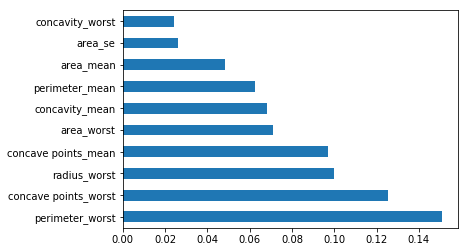

In [23]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=15, max_features=5, min_samples_split=3)
model.fit(X_train, Y_train)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


Now that we have the top 10 features in our model, lets see how our accuracies do if we use reduce our dataset to only include these columns.

In [24]:
# sns.heatmap(cm,annot=True,fmt="d")
from sklearn.base import clone
importances = model.feature_importances_
list = [15, 10, 6]
for i in list:
    
    X_train_df = pd.DataFrame(data = X_train)
    X_test_df = pd.DataFrame(data = X_test)
    X_train_reduced = X_train_df[X_train_df.columns.values[(np.argsort(importances)[::-1])[:i]]]
    X_test_reduced = X_test_df[X_test_df.columns.values[(np.argsort(importances)[::-1])[:i]]]
    clf = model.fit(X_train_reduced, Y_train)
    reduced_prediction = clf.predict(X_test_reduced)
    print(i, "  -  ",accuracy_score(Y_test, reduced_prediction))

15   -   0.9590643274853801
10   -   0.9532163742690059
6   -   0.9415204678362573


### Overview
As we can see, reducing the number of features does not have a significant impact on the accuracy scores.
This is somewhat to be expected however, as the most prominent features in the model are the 'worst' features, which are calculated by taking the average of these largest in this field. This essentially means that, an average was taken from the women with the biggest, perimeter of the lump for example. This makes sense that the largest of these features would correlate to a lump being malignant or not.
This would mean, looking at future data, we would be concerned about those whose measurements fall within the 'worst' categories as this gives a large indication that their lump is malignant.

This gives a thought to what else we could do with the data, how well would the model do if we only kept the 'worst'/'largest' columns? Give it a go.